In [ ]:
R.version.string

[1] "R version 4.2.2 Patched (2022-11-10 r83330)"

In [ ]:
install.packages('reshape2')
install.packages('pwr')
install.packages('gdata')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gtools’




In [ ]:
if(!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("ssize")
BiocManager::install("marray")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.16 (BiocManager 1.30.19), R 4.2.2 Patched (2022-11-10
  r83330)

Installing package(s) 'BiocVersion', 'ssize'

also installing the dependency ‘xtable’


Old packages: 'bit', 'data.table', 'devtools', 'knitr', 'pkgload', 'sass',
  'tidyverse', 'vctrs', 'xfun', 'boot', 'foreign'

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.16 (BiocManager 1.30.19), R 4.2.2 Patched (2022-11-10
  r83330)

Installing package(s) 'marray'

also installing the dependency ‘limma’


Old packages: 'bit', 'data.table', 'devtools', 'knitr', 'pkgload', 'sass',
  'tidyverse', 'vctrs', 'xfun', 'boot', 'foreign'



In [ ]:
library(ggplot2)
library(tidyr)
library(dplyr)
library(reshape2)
library(pwr)
library(ssize)
library(gdata)
library(marray)

In [ ]:
BiocManager::install("Biobase")
BiocManager::install("GEOquery")

In [ ]:
library(Biobase)
library(GEOquery)

Setting options('download.file.method.GEOquery'='auto')

Setting options('GEOquery.inmemory.gpl'=FALSE)



In [ ]:
# #Or, open an existing GDS file (even if its compressed):
# gds858 <- getGEO(filename='GDS858.soft.gz')
#Download GDS file, put it in the current directory, and load it:
# gds4877 <- getGEO('GPL4134', destdir=".")

In [ ]:
gds4877 <- getGEO('GDS4877', destdir=".")

Using locally cached version of GDS4877 found here:
./GDS4877.soft.gz 



In [ ]:
gds4877@header

$channel_count
[1] "1"

$dataset_id
[1] "GDS4877" "GDS4877"

$description
[1] "Analysis of TOV112D ovarian cancer cells following treatment with NSC319726, a member of the thiosemicarbzone family of metal ion chelators. NSC319726 inhibits the growth of mutant p53 cells. Results provide insight into the mechanism of action of NSC319726."
[2] "control"                                                                                                                                                                                                                                                           
[3] "NSC319726"                                                                                                                                                                                                                                                         

$email
[1] "geo@ncbi.nlm.nih.gov"

$feature_count
[1] "54675"

$institute
[1] "NCBI NLM NIH"

$name
[1] "Gene Expression Omnibus (GEO)"

$order
[1] "none"

$platform
[1] "GPL570"

$platform_organism
[1] "Homo sapiens"

$platform_technology_type
[1] "in situ oligonucleotide"

$pubmed_id
[1] "22624712"

$ref
[1] "Nucleic Acids Res. 2005 Jan 1;33 Database Issue:D562-6"

$reference_series
[1] "GSE35972"

$sample_count
[1] "6"

$sample_id
[1] "GSM878200,GSM878201,GSM878202" "GSM878203,GSM878204,GSM878205"

$sample_organism
[1] "Homo sapiens"

$sample_type
[1] "RNA"

$title
[1] "Ovarian cancer cell line response to the anticancer drug NSC319726"

$type
[1] "Expression profiling by array" "agent"                        
[3] "agent"                        

$update_date
[1] "Apr 29 2014"

$value_type
[1] "transformed count"

$web_link
[1] "http://www.ncbi.nlm.nih.gov/geo"

In [ ]:
annot = gds4877@dataTable@columns
annot

sample,agent,description
<chr>,<fct>,<chr>
GSM878200,control,Value for GSM878200: TOV112D cells_untreated_biological rep1; src: TOV112D cells_untreated
GSM878201,control,Value for GSM878201: TOV112D cells_untreated_biological rep2; src: TOV112D cells_untreated
GSM878202,control,Value for GSM878202: TOV112D cells_untreated_biological rep3; src: TOV112D cells_untreated
GSM878203,NSC319726,Value for GSM878203: TOV112D cells_treated with NSC319726_biological rep1; src: TOV112D cells_treated with NSC319726
GSM878204,NSC319726,Value for GSM878204: TOV112D cells_treated with NSC319726_biological rep2; src: TOV112D cells_treated with NSC319726
GSM878205,NSC319726,Value for GSM878205: TOV112D cells_treated with NSC319726_biological rep3; src: TOV112D cells_treated with NSC319726


In [ ]:
dt = gds4877@dataTable@table
head(dt)

,ID_REF,IDENTIFIER,GSM878200,GSM878201,GSM878202,GSM878203,GSM878204,GSM878205
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1007_s_at,MIR4640,8.47317,8.54549,8.57559,8.71128,8.33301,8.45165
2,1053_at,RFC2,9.12632,9.02977,8.46047,8.80934,8.93598,8.10066
3,117_at,HSPA6,5.36694,5.25708,5.12728,9.57696,5.07302,5.21245
4,121_at,PAX8,7.15984,7.18389,7.42131,7.11768,7.35202,7.23397
5,1255_g_at,GUCA1A,2.63282,2.54170,2.50575,2.79574,2.76264,2.73996
6,1294_at,MIR5193,5.22361,5.23782,5.23614,5.27101,5.23804,5.42573


In [ ]:
table(dt$IDENTIFIER)

In [ ]:
colnames(dt)

[1] "ID_REF"     "IDENTIFIER" "GSM878200"  "GSM878201"  "GSM878202" 
[6] "GSM878203"  "GSM878204"  "GSM878205"

In [ ]:
IDENTIFIER = dt$IDENTIFIER

In [ ]:
row.names(dt) = dt$ID_REF
head(dt)

,ID_REF,IDENTIFIER,GSM878200,GSM878201,GSM878202,GSM878203,GSM878204,GSM878205
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1007_s_at,1007_s_at,MIR4640,8.47317,8.54549,8.57559,8.71128,8.33301,8.45165
1053_at,1053_at,RFC2,9.12632,9.02977,8.46047,8.80934,8.93598,8.10066
117_at,117_at,HSPA6,5.36694,5.25708,5.12728,9.57696,5.07302,5.21245
121_at,121_at,PAX8,7.15984,7.18389,7.42131,7.11768,7.35202,7.23397
1255_g_at,1255_g_at,GUCA1A,2.63282,2.54170,2.50575,2.79574,2.76264,2.73996
1294_at,1294_at,MIR5193,5.22361,5.23782,5.23614,5.27101,5.23804,5.42573


In [ ]:
unique(dt$IDENTIFIER)[1:5]

[1] "MIR4640" "RFC2"    "HSPA6"   "PAX8"    "GUCA1A"

In [ ]:
head(dt[3:length(colnames(dt))])

,GSM878200,GSM878201,GSM878202,GSM878203,GSM878204,GSM878205
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1007_s_at,8.47317,8.54549,8.57559,8.71128,8.33301,8.45165
1053_at,9.12632,9.02977,8.46047,8.80934,8.93598,8.10066
117_at,5.36694,5.25708,5.12728,9.57696,5.07302,5.21245
121_at,7.15984,7.18389,7.42131,7.11768,7.35202,7.23397
1255_g_at,2.63282,2.54170,2.50575,2.79574,2.76264,2.73996
1294_at,5.22361,5.23782,5.23614,5.27101,5.23804,5.42573


In [ ]:
dt_ = t(dt[3:length(colnames(dt))])
head(dt_)

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,⋯,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
GSM878200,8.47317,9.12632,5.36694,7.15984,2.63282,5.22361,6.95113,5.70232,3.03179,4.00848,⋯,12.4275,11.8478,13.8108,13.5887,7.97358,6.91545,7.11894,2.43529,2.98027,2.98588
GSM878201,8.54549,9.02977,5.25708,7.18389,2.54170,5.23782,6.93055,5.14683,3.22757,3.73757,⋯,12.4574,11.8156,13.9563,13.6369,7.92138,6.79585,7.11724,2.47555,2.99911,3.04700
GSM878202,8.57559,8.46047,5.12728,7.42131,2.50575,5.23614,6.74418,5.32160,2.98063,3.93639,⋯,12.5871,12.0635,13.8894,13.5757,7.93992,6.78112,6.95004,2.58799,2.91629,3.02069
GSM878203,8.71128,8.80934,9.57696,7.11768,2.79574,5.27101,6.87360,6.93830,3.45697,4.88047,⋯,12.5922,11.9797,13.8984,13.6467,8.05609,6.80935,7.14423,2.43935,2.95026,2.98345
GSM878204,8.33301,8.93598,5.07302,7.35202,2.76264,5.23804,7.29849,5.70683,3.95914,3.83972,⋯,12.7152,11.9871,13.9370,13.6653,8.25777,7.09074,7.41788,2.47983,3.00269,3.05181
GSM878205,8.45165,8.10066,5.21245,7.23397,2.73996,5.42573,7.66506,6.50058,3.86253,4.12199,⋯,12.7969,12.1713,13.8884,13.6756,8.20401,7.04833,7.24720,2.50071,2.96409,2.97451


In [ ]:
colnames(dt)

[1] "ID_REF"     "IDENTIFIER" "GSM878200"  "GSM878201"  "GSM878202" 
[6] "GSM878203"  "GSM878204"  "GSM878205"

In [ ]:
row.names(dt_)

[1] "GSM878200" "GSM878201" "GSM878202" "GSM878203" "GSM878204" "GSM878205"

In [ ]:
row.names(annot) = annot$sample
annot_ = annot[2:3]

In [ ]:
bc = merge(annot_[1], dt_, by = 'row.names', all = TRUE)
bc

Row.names,agent,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,⋯,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
<I<chr>>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM878200,control,8.47317,9.12632,5.36694,7.15984,2.63282,5.22361,6.95113,5.70232,⋯,12.4275,11.8478,13.8108,13.5887,7.97358,6.91545,7.11894,2.43529,2.98027,2.98588
GSM878201,control,8.54549,9.02977,5.25708,7.18389,2.54170,5.23782,6.93055,5.14683,⋯,12.4574,11.8156,13.9563,13.6369,7.92138,6.79585,7.11724,2.47555,2.99911,3.04700
GSM878202,control,8.57559,8.46047,5.12728,7.42131,2.50575,5.23614,6.74418,5.32160,⋯,12.5871,12.0635,13.8894,13.5757,7.93992,6.78112,6.95004,2.58799,2.91629,3.02069
GSM878203,NSC319726,8.71128,8.80934,9.57696,7.11768,2.79574,5.27101,6.87360,6.93830,⋯,12.5922,11.9797,13.8984,13.6467,8.05609,6.80935,7.14423,2.43935,2.95026,2.98345
GSM878204,NSC319726,8.33301,8.93598,5.07302,7.35202,2.76264,5.23804,7.29849,5.70683,⋯,12.7152,11.9871,13.9370,13.6653,8.25777,7.09074,7.41788,2.47983,3.00269,3.05181
GSM878205,NSC319726,8.45165,8.10066,5.21245,7.23397,2.73996,5.42573,7.66506,6.50058,⋯,12.7969,12.1713,13.8884,13.6756,8.20401,7.04833,7.24720,2.50071,2.96409,2.97451


#1) Remove outliers.  

In [ ]:
BiocManager::install('multtest')

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.16 (BiocManager 1.30.19), R 4.2.2 Patched (2022-11-10
  r83330)

Installing package(s) 'multtest'

Old packages: 'bit', 'data.table', 'devtools', 'pkgload', 'tidyverse', 'vctrs',
  'xfun', 'foreign'



In [ ]:
library(multtest)
library(MASS)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [ ]:
df = read.table('lung_cancer_data.txt', header=1) 
head(df[1:10])

,probe,Adeno1,Adeno2,Adeno3,Adeno4,Adeno5,Adeno6,Adeno7,Adeno8,Adeno9
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1007_s_at,9.26,8.69,8.51,8.38,7.70,8.16,7.73,8.33,7.47
2,1053_at,5.15,4.57,5.20,4.92,4.60,5.24,4.64,5.64,5.64
3,121_at,7.35,7.32,7.13,7.50,7.40,7.35,7.32,7.32,7.09
4,1294_at,6.14,6.32,6.09,6.08,5.98,6.09,6.43,5.86,6.63
5,1487_at,6.45,6.13,6.64,6.54,5.93,6.51,6.09,6.36,6.47
6,1729_at,6.10,6.13,6.52,6.83,6.16,6.12,6.08,6.42,5.85


In [ ]:
colnames(df)

[1] "probe"   "Adeno1"  "Adeno2"  "Adeno3"  "Adeno4"  "Adeno5"  "Adeno6" 
 [8] "Adeno7"  "Adeno8"  "Adeno9"  "Adeno10" "SCLC1"   "SCLC2"   "SCLC3"  
[15] "SCLC4"   "SCLC5"   "SCLC6"   "SCLC7"   "SCLC8"   "SCLC9"   "Normal1"
[22] "Normal2" "Normal3" "Normal4" "Normal5"

In [ ]:
classes = as.factor(colnames(df)[2:length(colnames(df))])
classes

[1] Adeno1  Adeno2  Adeno3  Adeno4  Adeno5  Adeno6  Adeno7  Adeno8  Adeno9 
[10] Adeno10 SCLC1   SCLC2   SCLC3   SCLC4   SCLC5   SCLC6   SCLC7   SCLC8  
[19] SCLC9   Normal1 Normal2 Normal3 Normal4 Normal5
24 Levels: Adeno1 Adeno10 Adeno2 Adeno3 Adeno4 Adeno5 Adeno6 Adeno7 ... SCLC9

In [ ]:
length(colnames(df)[2:length(colnames(df))])

[1] 24

In [ ]:
dim(df)

[1] 3013   25

In [ ]:
cn = colnames(df)[2:length(colnames(df))]
cn

[1] "Adeno1"  "Adeno2"  "Adeno3"  "Adeno4"  "Adeno5"  "Adeno6"  "Adeno7" 
 [8] "Adeno8"  "Adeno9"  "Adeno10" "SCLC1"   "SCLC2"   "SCLC3"   "SCLC4"  
[15] "SCLC5"   "SCLC6"   "SCLC7"   "SCLC8"   "SCLC9"   "Normal1" "Normal2"
[22] "Normal3" "Normal4" "Normal5"

In [ ]:
cn <- gsub("\\d+", "", cn)
cn

[1] "Adeno"  "Adeno"  "Adeno"  "Adeno"  "Adeno"  "Adeno"  "Adeno"  "Adeno" 
 [9] "Adeno"  "Adeno"  "SCLC"   "SCLC"   "SCLC"   "SCLC"   "SCLC"   "SCLC"  
[17] "SCLC"   "SCLC"   "SCLC"   "Normal" "Normal" "Normal" "Normal" "Normal"

In [ ]:
length(row.names(df))

[1] 3013

In [ ]:
names(df)

[1] "probe"   "Adeno1"  "Adeno2"  "Adeno3"  "Adeno4"  "Adeno5"  "Adeno6" 
 [8] "Adeno7"  "Adeno8"  "Adeno9"  "Adeno10" "SCLC1"   "SCLC2"   "SCLC3"  
[15] "SCLC4"   "SCLC5"   "SCLC6"   "SCLC7"   "SCLC8"   "SCLC9"   "Normal1"
[22] "Normal2" "Normal3" "Normal4" "Normal5"

In [ ]:
length(df$probe)

[1] 3013

In [ ]:
row.names(df) = df$probe
original_cn = colnames(df)
head(df[, 2:length(colnames(df))])

,Adeno1,Adeno2,Adeno3,Adeno4,Adeno5,Adeno6,Adeno7,Adeno8,Adeno9,Adeno10,⋯,SCLC5,SCLC6,SCLC7,SCLC8,SCLC9,Normal1,Normal2,Normal3,Normal4,Normal5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1007_s_at,9.26,8.69,8.51,8.38,7.70,8.16,7.73,8.33,7.47,8.39,⋯,8.37,8.24,8.16,8.19,8.23,8.96,8.15,9.40,8.96,9.32
1053_at,5.15,4.57,5.20,4.92,4.60,5.24,4.64,5.64,5.64,5.42,⋯,5.90,5.65,5.84,5.69,5.10,4.57,4.82,5.31,4.93,4.79
121_at,7.35,7.32,7.13,7.50,7.40,7.35,7.32,7.32,7.09,7.08,⋯,7.08,7.05,7.03,7.03,7.07,7.34,6.89,7.23,7.14,7.29
1294_at,6.14,6.32,6.09,6.08,5.98,6.09,6.43,5.86,6.63,6.11,⋯,5.44,5.61,6.02,5.79,5.66,6.02,6.08,6.33,6.22,6.43
1487_at,6.45,6.13,6.64,6.54,5.93,6.51,6.09,6.36,6.47,6.22,⋯,5.83,5.69,6.13,5.91,6.28,6.43,6.36,6.12,6.23,6.27
1729_at,6.10,6.13,6.52,6.83,6.16,6.12,6.08,6.42,5.85,6.54,⋯,5.71,5.68,6.07,5.71,5.83,6.56,5.80,6.68,7.05,7.25


In [ ]:
original_cn[2:length(original_cn)]

[1] "Adeno1"  "Adeno2"  "Adeno3"  "Adeno4"  "Adeno5"  "Adeno6"  "Adeno7" 
 [8] "Adeno8"  "Adeno9"  "Adeno10" "SCLC1"   "SCLC2"   "SCLC3"   "SCLC4"  
[15] "SCLC5"   "SCLC6"   "SCLC7"   "SCLC8"   "SCLC9"   "Normal1" "Normal2"
[22] "Normal3" "Normal4" "Normal5"

In [ ]:
length(row.names(df))

[1] 3013

#2)	Load the MASS library and create a variable that has the class names for the 3 classes in the data.  This variable should be of length 24.  Next, bind the variable that you just created to a transposition of the data matrix using the data.frame() function.  Note: the dimensions of this final data matrix should be 24 x 3014.

In [ ]:
# names <- names(df)
# dat  <- data.frame(names, t(df))
# rbind(dat[1:6,] , dat[11:16,] , dat[20:22,])

In [ ]:
t_df = as.data.frame(t(df[, 2:length(colnames(df))]))
t_df$class = cn
row.names(t_df) = 1:length(row.names(t_df))
head(t_df[, 1:10])

,1007_s_at,1053_at,121_at,1294_at,1487_at,1729_at,177_at,200003_s_at,200005_at,200016_x_at
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9.26,5.15,7.35,6.14,6.45,6.10,4.63,11.71,8.16,9.95
2,8.69,4.57,7.32,6.32,6.13,6.13,4.72,10.72,7.26,10.24
3,8.51,5.20,7.13,6.09,6.64,6.52,4.86,10.99,8.60,9.71
4,8.38,4.92,7.50,6.08,6.54,6.83,4.42,10.67,7.05,9.58
5,7.70,4.60,7.40,5.98,5.93,6.16,4.41,10.82,7.43,9.35
6,8.16,5.24,7.35,6.09,6.51,6.12,4.79,10.69,7.62,9.52


In [ ]:
dim(t_df)

[1]   24 3014

In [ ]:
t_df

,1007_s_at,1053_at,121_at,1294_at,1487_at,1729_at,177_at,200003_s_at,200005_at,200016_x_at,⋯,78047_s_at,823_at,90265_at,AFFX-HSAC07/X00351_3_at,AFFX-HSAC07/X00351_M_at,AFFX-HUMGAPDH/M33197_5_at,AFFX-M27830_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,9.26,5.15,7.35,6.14,6.45,6.10,4.63,11.71,8.16,9.95,⋯,6.85,6.03,6.96,12.25,11.35,10.09,5.71,8.45,8.16,Adeno
2,8.69,4.57,7.32,6.32,6.13,6.13,4.72,10.72,7.26,10.24,⋯,7.21,5.67,7.36,11.71,9.59,7.75,5.64,7.13,8.17,Adeno
3,8.51,5.20,7.13,6.09,6.64,6.52,4.86,10.99,8.60,9.71,⋯,6.78,5.22,7.26,11.65,10.86,9.13,5.60,6.92,7.86,Adeno
4,8.38,4.92,7.50,6.08,6.54,6.83,4.42,10.67,7.05,9.58,⋯,6.85,6.24,7.11,11.07,10.17,10.18,5.74,7.50,7.91,Adeno
5,7.70,4.60,7.40,5.98,5.93,6.16,4.41,10.82,7.43,9.35,⋯,6.73,5.96,6.98,11.73,9.83,9.22,5.86,7.67,7.68,Adeno
6,8.16,5.24,7.35,6.09,6.51,6.12,4.79,10.69,7.62,9.52,⋯,6.88,6.14,7.12,11.06,9.85,10.30,5.67,7.59,7.82,Adeno
7,7.73,4.64,7.32,6.43,6.09,6.08,4.85,10.89,7.51,9.74,⋯,6.77,5.81,7.07,11.58,10.53,8.28,5.35,7.80,8.26,Adeno
8,8.33,5.64,7.32,5.86,6.36,6.42,4.76,11.13,8.52,9.59,⋯,6.70,4.86,6.81,11.44,10.48,9.81,5.56,9.16,8.96,Adeno
9,7.47,5.64,7.09,6.63,6.47,5.85,4.96,11.26,7.53,9.96,⋯,6.63,5.01,7.27,11.26,8.73,8.22,5.62,10.17,9.50,Adeno


In [ ]:
adeno = t_df[t_df$class == 'Adeno', ]
adeno

,1007_s_at,1053_at,121_at,1294_at,1487_at,1729_at,177_at,200003_s_at,200005_at,200016_x_at,⋯,78047_s_at,823_at,90265_at,AFFX-HSAC07/X00351_3_at,AFFX-HSAC07/X00351_M_at,AFFX-HUMGAPDH/M33197_5_at,AFFX-M27830_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,9.26,5.15,7.35,6.14,6.45,6.10,4.63,11.71,8.16,9.95,⋯,6.85,6.03,6.96,12.25,11.35,10.09,5.71,8.45,8.16,Adeno
2,8.69,4.57,7.32,6.32,6.13,6.13,4.72,10.72,7.26,10.24,⋯,7.21,5.67,7.36,11.71,9.59,7.75,5.64,7.13,8.17,Adeno
3,8.51,5.20,7.13,6.09,6.64,6.52,4.86,10.99,8.60,9.71,⋯,6.78,5.22,7.26,11.65,10.86,9.13,5.60,6.92,7.86,Adeno
4,8.38,4.92,7.50,6.08,6.54,6.83,4.42,10.67,7.05,9.58,⋯,6.85,6.24,7.11,11.07,10.17,10.18,5.74,7.50,7.91,Adeno
5,7.70,4.60,7.40,5.98,5.93,6.16,4.41,10.82,7.43,9.35,⋯,6.73,5.96,6.98,11.73,9.83,9.22,5.86,7.67,7.68,Adeno
6,8.16,5.24,7.35,6.09,6.51,6.12,4.79,10.69,7.62,9.52,⋯,6.88,6.14,7.12,11.06,9.85,10.30,5.67,7.59,7.82,Adeno
7,7.73,4.64,7.32,6.43,6.09,6.08,4.85,10.89,7.51,9.74,⋯,6.77,5.81,7.07,11.58,10.53,8.28,5.35,7.80,8.26,Adeno
8,8.33,5.64,7.32,5.86,6.36,6.42,4.76,11.13,8.52,9.59,⋯,6.70,4.86,6.81,11.44,10.48,9.81,5.56,9.16,8.96,Adeno
9,7.47,5.64,7.09,6.63,6.47,5.85,4.96,11.26,7.53,9.96,⋯,6.63,5.01,7.27,11.26,8.73,8.22,5.62,10.17,9.50,Adeno


In [ ]:
adeno_tr = adeno[1:6, ]
adeno_tr

,1007_s_at,1053_at,121_at,1294_at,1487_at,1729_at,177_at,200003_s_at,200005_at,200016_x_at,⋯,78047_s_at,823_at,90265_at,AFFX-HSAC07/X00351_3_at,AFFX-HSAC07/X00351_M_at,AFFX-HUMGAPDH/M33197_5_at,AFFX-M27830_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,9.26,5.15,7.35,6.14,6.45,6.10,4.63,11.71,8.16,9.95,⋯,6.85,6.03,6.96,12.25,11.35,10.09,5.71,8.45,8.16,Adeno
2,8.69,4.57,7.32,6.32,6.13,6.13,4.72,10.72,7.26,10.24,⋯,7.21,5.67,7.36,11.71,9.59,7.75,5.64,7.13,8.17,Adeno
3,8.51,5.20,7.13,6.09,6.64,6.52,4.86,10.99,8.60,9.71,⋯,6.78,5.22,7.26,11.65,10.86,9.13,5.60,6.92,7.86,Adeno
4,8.38,4.92,7.50,6.08,6.54,6.83,4.42,10.67,7.05,9.58,⋯,6.85,6.24,7.11,11.07,10.17,10.18,5.74,7.50,7.91,Adeno
5,7.70,4.60,7.40,5.98,5.93,6.16,4.41,10.82,7.43,9.35,⋯,6.73,5.96,6.98,11.73,9.83,9.22,5.86,7.67,7.68,Adeno
6,8.16,5.24,7.35,6.09,6.51,6.12,4.79,10.69,7.62,9.52,⋯,6.88,6.14,7.12,11.06,9.85,10.30,5.67,7.59,7.82,Adeno


In [ ]:
adeno_te = adeno[7:10, ]
adeno_te

,1007_s_at,1053_at,121_at,1294_at,1487_at,1729_at,177_at,200003_s_at,200005_at,200016_x_at,⋯,78047_s_at,823_at,90265_at,AFFX-HSAC07/X00351_3_at,AFFX-HSAC07/X00351_M_at,AFFX-HUMGAPDH/M33197_5_at,AFFX-M27830_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
7,7.73,4.64,7.32,6.43,6.09,6.08,4.85,10.89,7.51,9.74,⋯,6.77,5.81,7.07,11.58,10.53,8.28,5.35,7.80,8.26,Adeno
8,8.33,5.64,7.32,5.86,6.36,6.42,4.76,11.13,8.52,9.59,⋯,6.70,4.86,6.81,11.44,10.48,9.81,5.56,9.16,8.96,Adeno
9,7.47,5.64,7.09,6.63,6.47,5.85,4.96,11.26,7.53,9.96,⋯,6.63,5.01,7.27,11.26,8.73,8.22,5.62,10.17,9.50,Adeno
10,8.39,5.42,7.08,6.11,6.22,6.54,4.57,11.10,7.92,10.10,⋯,6.68,6.27,7.38,11.03,8.81,7.82,5.41,8.69,8.68,Adeno


In [ ]:
sclc = t_df[t_df$class == 'SCLC', ]
sclc

,1007_s_at,1053_at,121_at,1294_at,1487_at,1729_at,177_at,200003_s_at,200005_at,200016_x_at,⋯,78047_s_at,823_at,90265_at,AFFX-HSAC07/X00351_3_at,AFFX-HSAC07/X00351_M_at,AFFX-HUMGAPDH/M33197_5_at,AFFX-M27830_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
11,7.88,5.85,7.06,5.69,6.16,6.12,4.73,10.83,7.40,10.27,⋯,6.74,5.55,6.77,10.62,9.63,11.02,5.66,8.37,8.16,SCLC
12,8.43,5.31,7.12,5.97,6.24,6.39,4.84,11.06,7.76,10.46,⋯,6.47,5.67,6.73,10.98,9.03,10.11,5.39,7.61,7.80,SCLC
13,7.84,6.18,7.20,5.71,6.12,6.45,4.47,10.74,7.74,9.88,⋯,6.74,5.64,6.88,10.52,9.84,11.14,5.41,8.47,8.39,SCLC
14,8.31,5.76,7.09,5.81,5.85,5.84,4.63,10.47,7.37,10.24,⋯,6.36,5.45,6.67,10.90,10.30,10.43,5.31,8.31,8.48,SCLC
15,8.37,5.90,7.08,5.44,5.83,5.71,4.58,10.57,7.17,10.12,⋯,6.54,5.34,6.65,11.19,10.36,9.88,5.27,9.52,8.75,SCLC
16,8.24,5.65,7.05,5.61,5.69,5.68,4.43,10.43,7.51,9.84,⋯,6.35,5.32,6.78,10.82,10.41,10.11,5.33,7.21,7.76,SCLC
17,8.16,5.84,7.03,6.02,6.13,6.07,4.42,10.48,7.15,10.03,⋯,6.44,5.32,6.73,10.49,10.02,10.17,5.38,8.47,8.57,SCLC
18,8.19,5.69,7.03,5.79,5.91,5.71,4.44,10.54,7.15,10.47,⋯,6.45,5.18,6.61,11.17,10.00,10.19,5.46,7.94,7.88,SCLC
19,8.23,5.10,7.07,5.66,6.28,5.83,4.33,10.48,7.11,10.46,⋯,6.45,5.51,6.79,10.97,9.36,9.27,5.44,8.38,8.79,SCLC


In [ ]:
sclc_tr = sclc[1:6, ]
sclc_tr

,1007_s_at,1053_at,121_at,1294_at,1487_at,1729_at,177_at,200003_s_at,200005_at,200016_x_at,⋯,78047_s_at,823_at,90265_at,AFFX-HSAC07/X00351_3_at,AFFX-HSAC07/X00351_M_at,AFFX-HUMGAPDH/M33197_5_at,AFFX-M27830_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
11,7.88,5.85,7.06,5.69,6.16,6.12,4.73,10.83,7.40,10.27,⋯,6.74,5.55,6.77,10.62,9.63,11.02,5.66,8.37,8.16,SCLC
12,8.43,5.31,7.12,5.97,6.24,6.39,4.84,11.06,7.76,10.46,⋯,6.47,5.67,6.73,10.98,9.03,10.11,5.39,7.61,7.80,SCLC
13,7.84,6.18,7.20,5.71,6.12,6.45,4.47,10.74,7.74,9.88,⋯,6.74,5.64,6.88,10.52,9.84,11.14,5.41,8.47,8.39,SCLC
14,8.31,5.76,7.09,5.81,5.85,5.84,4.63,10.47,7.37,10.24,⋯,6.36,5.45,6.67,10.90,10.30,10.43,5.31,8.31,8.48,SCLC
15,8.37,5.90,7.08,5.44,5.83,5.71,4.58,10.57,7.17,10.12,⋯,6.54,5.34,6.65,11.19,10.36,9.88,5.27,9.52,8.75,SCLC
16,8.24,5.65,7.05,5.61,5.69,5.68,4.43,10.43,7.51,9.84,⋯,6.35,5.32,6.78,10.82,10.41,10.11,5.33,7.21,7.76,SCLC


In [ ]:
sclc_te = sclc[7:dim(sclc)[1], ]
sclc_te

,1007_s_at,1053_at,121_at,1294_at,1487_at,1729_at,177_at,200003_s_at,200005_at,200016_x_at,⋯,78047_s_at,823_at,90265_at,AFFX-HSAC07/X00351_3_at,AFFX-HSAC07/X00351_M_at,AFFX-HUMGAPDH/M33197_5_at,AFFX-M27830_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
17,8.16,5.84,7.03,6.02,6.13,6.07,4.42,10.48,7.15,10.03,⋯,6.44,5.32,6.73,10.49,10.02,10.17,5.38,8.47,8.57,SCLC
18,8.19,5.69,7.03,5.79,5.91,5.71,4.44,10.54,7.15,10.47,⋯,6.45,5.18,6.61,11.17,10.00,10.19,5.46,7.94,7.88,SCLC
19,8.23,5.10,7.07,5.66,6.28,5.83,4.33,10.48,7.11,10.46,⋯,6.45,5.51,6.79,10.97,9.36,9.27,5.44,8.38,8.79,SCLC


In [ ]:
normal = t_df[t_df$class == 'Normal', ]
normal_tr = normal[1:3, ]
normal_tr

,1007_s_at,1053_at,121_at,1294_at,1487_at,1729_at,177_at,200003_s_at,200005_at,200016_x_at,⋯,78047_s_at,823_at,90265_at,AFFX-HSAC07/X00351_3_at,AFFX-HSAC07/X00351_M_at,AFFX-HUMGAPDH/M33197_5_at,AFFX-M27830_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
20,8.96,4.57,7.34,6.02,6.43,6.56,4.77,10.77,8.13,9.98,⋯,6.86,6.52,7.01,10.75,9.71,8.99,5.54,7.16,7.42,Normal
21,8.15,4.82,6.89,6.08,6.36,5.80,4.44,10.59,7.76,9.62,⋯,6.30,6.71,6.29,10.30,8.21,7.70,5.33,6.47,7.02,Normal
22,9.40,5.31,7.23,6.33,6.12,6.68,5.27,10.95,8.22,9.59,⋯,6.63,6.02,6.92,10.77,8.69,10.44,5.34,8.02,8.21,Normal


In [ ]:
normal_te = normal[4:dim(normal)[1], ]
normal_te

,1007_s_at,1053_at,121_at,1294_at,1487_at,1729_at,177_at,200003_s_at,200005_at,200016_x_at,⋯,78047_s_at,823_at,90265_at,AFFX-HSAC07/X00351_3_at,AFFX-HSAC07/X00351_M_at,AFFX-HUMGAPDH/M33197_5_at,AFFX-M27830_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
23,8.96,4.93,7.14,6.22,6.23,7.05,4.81,11.05,7.77,9.71,⋯,6.98,6.07,6.95,10.79,8.70,9.78,5.51,7.04,7.70,Normal
24,9.32,4.79,7.29,6.43,6.27,7.25,4.90,11.45,7.86,9.96,⋯,6.93,6.89,6.95,10.48,8.72,9.45,5.49,6.89,7.71,Normal


In [ ]:
dim(adeno)[1]

[1] 10

In [ ]:
train = rbind(adeno_tr, sclc_tr, normal_tr)
train[, 1:10]

,1007_s_at,1053_at,121_at,1294_at,1487_at,1729_at,177_at,200003_s_at,200005_at,200016_x_at
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9.26,5.15,7.35,6.14,6.45,6.10,4.63,11.71,8.16,9.95
2,8.69,4.57,7.32,6.32,6.13,6.13,4.72,10.72,7.26,10.24
3,8.51,5.20,7.13,6.09,6.64,6.52,4.86,10.99,8.60,9.71
4,8.38,4.92,7.50,6.08,6.54,6.83,4.42,10.67,7.05,9.58
5,7.70,4.60,7.40,5.98,5.93,6.16,4.41,10.82,7.43,9.35
6,8.16,5.24,7.35,6.09,6.51,6.12,4.79,10.69,7.62,9.52
11,7.88,5.85,7.06,5.69,6.16,6.12,4.73,10.83,7.40,10.27
12,8.43,5.31,7.12,5.97,6.24,6.39,4.84,11.06,7.76,10.46
13,7.84,6.18,7.20,5.71,6.12,6.45,4.47,10.74,7.74,9.88


In [ ]:
test = rbind(adeno_te, sclc_te, normal_te)
test[,1:10]

,1007_s_at,1053_at,121_at,1294_at,1487_at,1729_at,177_at,200003_s_at,200005_at,200016_x_at
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7,7.73,4.64,7.32,6.43,6.09,6.08,4.85,10.89,7.51,9.74
8,8.33,5.64,7.32,5.86,6.36,6.42,4.76,11.13,8.52,9.59
9,7.47,5.64,7.09,6.63,6.47,5.85,4.96,11.26,7.53,9.96
10,8.39,5.42,7.08,6.11,6.22,6.54,4.57,11.10,7.92,10.10
17,8.16,5.84,7.03,6.02,6.13,6.07,4.42,10.48,7.15,10.03
18,8.19,5.69,7.03,5.79,5.91,5.71,4.44,10.54,7.15,10.47
19,8.23,5.10,7.07,5.66,6.28,5.83,4.33,10.48,7.11,10.46
23,8.96,4.93,7.14,6.22,6.23,7.05,4.81,11.05,7.77,9.71
24,9.32,4.79,7.29,6.43,6.27,7.25,4.90,11.45,7.86,9.96


#3) Now create 2 separate data matrices from the matrix created in #2 above – a training set and a test set.  The training set should include the following number of samples from each class: first 6 adenocarcinomas, first 6 SCLC, and first 3 normals.  The test set should include the remaining samples.  Put the first column of the test matrix that you just created into a new variable, since this will be the actual sample classes.  Then remove the first column from the test set.

In [ ]:
train_class = train$class
train

,1007_s_at,1053_at,121_at,1294_at,1487_at,1729_at,177_at,200003_s_at,200005_at,200016_x_at,⋯,78047_s_at,823_at,90265_at,AFFX-HSAC07/X00351_3_at,AFFX-HSAC07/X00351_M_at,AFFX-HUMGAPDH/M33197_5_at,AFFX-M27830_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,9.26,5.15,7.35,6.14,6.45,6.10,4.63,11.71,8.16,9.95,⋯,6.85,6.03,6.96,12.25,11.35,10.09,5.71,8.45,8.16,Adeno
2,8.69,4.57,7.32,6.32,6.13,6.13,4.72,10.72,7.26,10.24,⋯,7.21,5.67,7.36,11.71,9.59,7.75,5.64,7.13,8.17,Adeno
3,8.51,5.20,7.13,6.09,6.64,6.52,4.86,10.99,8.60,9.71,⋯,6.78,5.22,7.26,11.65,10.86,9.13,5.60,6.92,7.86,Adeno
4,8.38,4.92,7.50,6.08,6.54,6.83,4.42,10.67,7.05,9.58,⋯,6.85,6.24,7.11,11.07,10.17,10.18,5.74,7.50,7.91,Adeno
5,7.70,4.60,7.40,5.98,5.93,6.16,4.41,10.82,7.43,9.35,⋯,6.73,5.96,6.98,11.73,9.83,9.22,5.86,7.67,7.68,Adeno
6,8.16,5.24,7.35,6.09,6.51,6.12,4.79,10.69,7.62,9.52,⋯,6.88,6.14,7.12,11.06,9.85,10.30,5.67,7.59,7.82,Adeno
11,7.88,5.85,7.06,5.69,6.16,6.12,4.73,10.83,7.40,10.27,⋯,6.74,5.55,6.77,10.62,9.63,11.02,5.66,8.37,8.16,SCLC
12,8.43,5.31,7.12,5.97,6.24,6.39,4.84,11.06,7.76,10.46,⋯,6.47,5.67,6.73,10.98,9.03,10.11,5.39,7.61,7.80,SCLC
13,7.84,6.18,7.20,5.71,6.12,6.45,4.47,10.74,7.74,9.88,⋯,6.74,5.64,6.88,10.52,9.84,11.14,5.41,8.47,8.39,SCLC


In [ ]:
test_class = test$class
test

,1007_s_at,1053_at,121_at,1294_at,1487_at,1729_at,177_at,200003_s_at,200005_at,200016_x_at,⋯,78047_s_at,823_at,90265_at,AFFX-HSAC07/X00351_3_at,AFFX-HSAC07/X00351_M_at,AFFX-HUMGAPDH/M33197_5_at,AFFX-M27830_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
7,7.73,4.64,7.32,6.43,6.09,6.08,4.85,10.89,7.51,9.74,⋯,6.77,5.81,7.07,11.58,10.53,8.28,5.35,7.80,8.26,Adeno
8,8.33,5.64,7.32,5.86,6.36,6.42,4.76,11.13,8.52,9.59,⋯,6.70,4.86,6.81,11.44,10.48,9.81,5.56,9.16,8.96,Adeno
9,7.47,5.64,7.09,6.63,6.47,5.85,4.96,11.26,7.53,9.96,⋯,6.63,5.01,7.27,11.26,8.73,8.22,5.62,10.17,9.50,Adeno
10,8.39,5.42,7.08,6.11,6.22,6.54,4.57,11.10,7.92,10.10,⋯,6.68,6.27,7.38,11.03,8.81,7.82,5.41,8.69,8.68,Adeno
17,8.16,5.84,7.03,6.02,6.13,6.07,4.42,10.48,7.15,10.03,⋯,6.44,5.32,6.73,10.49,10.02,10.17,5.38,8.47,8.57,SCLC
18,8.19,5.69,7.03,5.79,5.91,5.71,4.44,10.54,7.15,10.47,⋯,6.45,5.18,6.61,11.17,10.00,10.19,5.46,7.94,7.88,SCLC
19,8.23,5.10,7.07,5.66,6.28,5.83,4.33,10.48,7.11,10.46,⋯,6.45,5.51,6.79,10.97,9.36,9.27,5.44,8.38,8.79,SCLC
23,8.96,4.93,7.14,6.22,6.23,7.05,4.81,11.05,7.77,9.71,⋯,6.98,6.07,6.95,10.79,8.70,9.78,5.51,7.04,7.70,Normal
24,9.32,4.79,7.29,6.43,6.27,7.25,4.90,11.45,7.86,9.96,⋯,6.93,6.89,6.95,10.48,8.72,9.45,5.49,6.89,7.71,Normal


In [ ]:
test_ = test[,1:length(colnames(test))-1]
test_

,1007_s_at,1053_at,121_at,1294_at,1487_at,1729_at,177_at,200003_s_at,200005_at,200016_x_at,⋯,65521_at,78047_s_at,823_at,90265_at,AFFX-HSAC07/X00351_3_at,AFFX-HSAC07/X00351_M_at,AFFX-HUMGAPDH/M33197_5_at,AFFX-M27830_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7,7.73,4.64,7.32,6.43,6.09,6.08,4.85,10.89,7.51,9.74,⋯,6.08,6.77,5.81,7.07,11.58,10.53,8.28,5.35,7.80,8.26
8,8.33,5.64,7.32,5.86,6.36,6.42,4.76,11.13,8.52,9.59,⋯,6.55,6.70,4.86,6.81,11.44,10.48,9.81,5.56,9.16,8.96
9,7.47,5.64,7.09,6.63,6.47,5.85,4.96,11.26,7.53,9.96,⋯,6.17,6.63,5.01,7.27,11.26,8.73,8.22,5.62,10.17,9.50
10,8.39,5.42,7.08,6.11,6.22,6.54,4.57,11.10,7.92,10.10,⋯,6.34,6.68,6.27,7.38,11.03,8.81,7.82,5.41,8.69,8.68
17,8.16,5.84,7.03,6.02,6.13,6.07,4.42,10.48,7.15,10.03,⋯,6.15,6.44,5.32,6.73,10.49,10.02,10.17,5.38,8.47,8.57
18,8.19,5.69,7.03,5.79,5.91,5.71,4.44,10.54,7.15,10.47,⋯,6.06,6.45,5.18,6.61,11.17,10.00,10.19,5.46,7.94,7.88
19,8.23,5.10,7.07,5.66,6.28,5.83,4.33,10.48,7.11,10.46,⋯,6.21,6.45,5.51,6.79,10.97,9.36,9.27,5.44,8.38,8.79
23,8.96,4.93,7.14,6.22,6.23,7.05,4.81,11.05,7.77,9.71,⋯,6.34,6.98,6.07,6.95,10.79,8.70,9.78,5.51,7.04,7.70
24,9.32,4.79,7.29,6.43,6.27,7.25,4.90,11.45,7.86,9.96,⋯,6.20,6.93,6.89,6.95,10.48,8.72,9.45,5.49,6.89,7.71


#4)	Now we want to run a classifier to see if we can predict the lung cancer types and discriminate them from both each other and the normal samples.  We will train the model on the training set and use the test set as our model accuracy assessment.

#Use the lda() function and train the model using the training set, but ONLY use the first 2 genes.  Predict the test set sample using the predict() function.  This function only requires 2 arguments – the variable that you saved the model construction in and the test set.  Make sure to only select the first 2 genes (i.e. columns) in the test set, when predicting the sample classes.  Use the table() function to see the confusion matrix.  Hint: if you saved your output from the predict function in the variable “out” and you called the variable created in #3 “lab”, then you use table like this:

> table(out$class,lab)
	
#How many total samples are misclassified?
5 samples were misclassified.


In [ ]:
# class(train)
head(train[, 1:2])

,1007_s_at,1053_at
,<dbl>,<dbl>
1,9.26,5.15
2,8.69,4.57
3,8.51,5.20
4,8.38,4.92
5,7.70,4.60
6,8.16,5.24


In [ ]:
head(train)

,1007_s_at,1053_at,121_at,1294_at,1487_at,1729_at,177_at,200003_s_at,200005_at,200016_x_at,⋯,78047_s_at,823_at,90265_at,AFFX-HSAC07/X00351_3_at,AFFX-HSAC07/X00351_M_at,AFFX-HUMGAPDH/M33197_5_at,AFFX-M27830_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,9.26,5.15,7.35,6.14,6.45,6.10,4.63,11.71,8.16,9.95,⋯,6.85,6.03,6.96,12.25,11.35,10.09,5.71,8.45,8.16,Adeno
2,8.69,4.57,7.32,6.32,6.13,6.13,4.72,10.72,7.26,10.24,⋯,7.21,5.67,7.36,11.71,9.59,7.75,5.64,7.13,8.17,Adeno
3,8.51,5.20,7.13,6.09,6.64,6.52,4.86,10.99,8.60,9.71,⋯,6.78,5.22,7.26,11.65,10.86,9.13,5.60,6.92,7.86,Adeno
4,8.38,4.92,7.50,6.08,6.54,6.83,4.42,10.67,7.05,9.58,⋯,6.85,6.24,7.11,11.07,10.17,10.18,5.74,7.50,7.91,Adeno
5,7.70,4.60,7.40,5.98,5.93,6.16,4.41,10.82,7.43,9.35,⋯,6.73,5.96,6.98,11.73,9.83,9.22,5.86,7.67,7.68,Adeno
6,8.16,5.24,7.35,6.09,6.51,6.12,4.79,10.69,7.62,9.52,⋯,6.88,6.14,7.12,11.06,9.85,10.30,5.67,7.59,7.82,Adeno


In [ ]:
# datx <- as.data.frame(t(dat))
datx = train[, 1:2]
datx

,1007_s_at,1053_at
,<dbl>,<dbl>
1,9.26,5.15
2,8.69,4.57
3,8.51,5.20
4,8.38,4.92
5,7.70,4.60
6,8.16,5.24
11,7.88,5.85
12,8.43,5.31
13,7.84,6.18


In [ ]:
clas = train$class
datx <- data.frame(clas,datx)
datx

,clas,X1007_s_at,X1053_at
,<chr>,<dbl>,<dbl>
1,Adeno,9.26,5.15
2,Adeno,8.69,4.57
3,Adeno,8.51,5.20
4,Adeno,8.38,4.92
5,Adeno,7.70,4.60
6,Adeno,8.16,5.24
11,SCLC,7.88,5.85
12,SCLC,8.43,5.31
13,SCLC,7.84,6.18


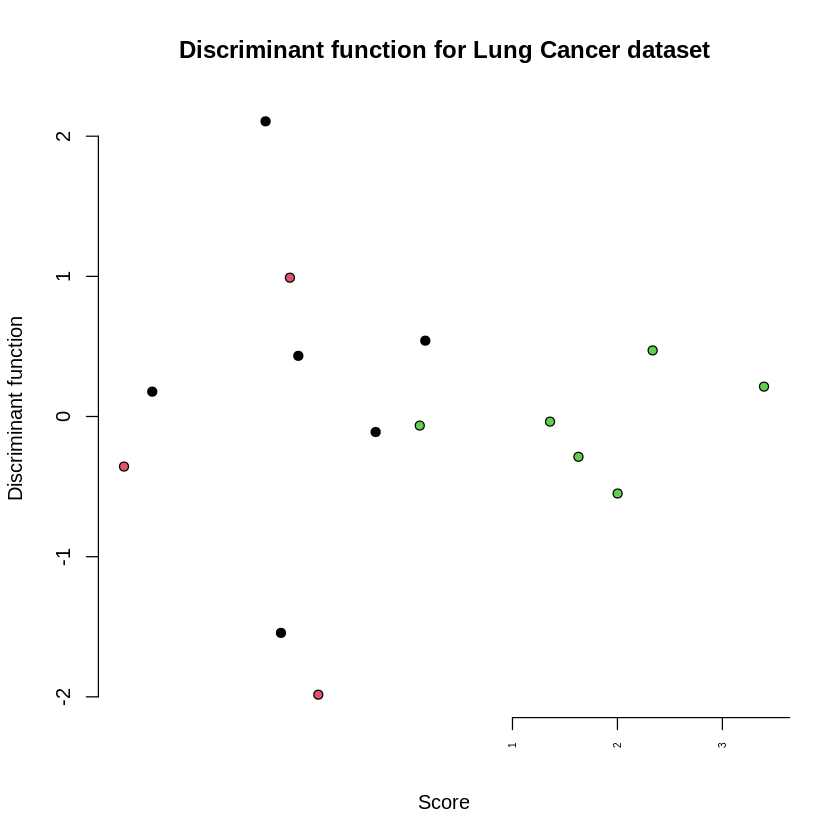

In [ ]:
dat.lda <- lda(clas~X1007_s_at + X1053_at,datx[2:3])
dat.pred <- predict(dat.lda,datx[2:3])
plot(dat.pred$x,bg=as.numeric(factor(clas)),pch=21,col=1,ylab="Discriminant function",axes=F,xlab="Score",main="Discriminant function for Lung Cancer dataset")
axis(1,at=c(1:62),names(clas),las=2,cex.axis=0.5)
axis(2)

In [ ]:
table(clas, dat.pred$class)

        
clas     Adeno Normal SCLC
  Adeno      5      1    0
  Normal     1      2    0
  SCLC       1      0    5

In [ ]:
colnames(test_)[1] = 'X1007_s_at'
colnames(test_)[2] = 'X1053_at'
test_[, 1:2]

,X1007_s_at,X1053_at
,<dbl>,<dbl>
7,7.73,4.64
8,8.33,5.64
9,7.47,5.64
10,8.39,5.42
17,8.16,5.84
18,8.19,5.69
19,8.23,5.10
23,8.96,4.93
24,9.32,4.79


In [ ]:
test

,1007_s_at,1053_at,121_at,1294_at,1487_at,1729_at,177_at,200003_s_at,200005_at,200016_x_at,⋯,78047_s_at,823_at,90265_at,AFFX-HSAC07/X00351_3_at,AFFX-HSAC07/X00351_M_at,AFFX-HUMGAPDH/M33197_5_at,AFFX-M27830_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
7,7.73,4.64,7.32,6.43,6.09,6.08,4.85,10.89,7.51,9.74,⋯,6.77,5.81,7.07,11.58,10.53,8.28,5.35,7.80,8.26,Adeno
8,8.33,5.64,7.32,5.86,6.36,6.42,4.76,11.13,8.52,9.59,⋯,6.70,4.86,6.81,11.44,10.48,9.81,5.56,9.16,8.96,Adeno
9,7.47,5.64,7.09,6.63,6.47,5.85,4.96,11.26,7.53,9.96,⋯,6.63,5.01,7.27,11.26,8.73,8.22,5.62,10.17,9.50,Adeno
10,8.39,5.42,7.08,6.11,6.22,6.54,4.57,11.10,7.92,10.10,⋯,6.68,6.27,7.38,11.03,8.81,7.82,5.41,8.69,8.68,Adeno
17,8.16,5.84,7.03,6.02,6.13,6.07,4.42,10.48,7.15,10.03,⋯,6.44,5.32,6.73,10.49,10.02,10.17,5.38,8.47,8.57,SCLC
18,8.19,5.69,7.03,5.79,5.91,5.71,4.44,10.54,7.15,10.47,⋯,6.45,5.18,6.61,11.17,10.00,10.19,5.46,7.94,7.88,SCLC
19,8.23,5.10,7.07,5.66,6.28,5.83,4.33,10.48,7.11,10.46,⋯,6.45,5.51,6.79,10.97,9.36,9.27,5.44,8.38,8.79,SCLC
23,8.96,4.93,7.14,6.22,6.23,7.05,4.81,11.05,7.77,9.71,⋯,6.98,6.07,6.95,10.79,8.70,9.78,5.51,7.04,7.70,Normal
24,9.32,4.79,7.29,6.43,6.27,7.25,4.90,11.45,7.86,9.96,⋯,6.93,6.89,6.95,10.48,8.72,9.45,5.49,6.89,7.71,Normal


In [ ]:
dat.pred <- predict(dat.lda, test_[, 1:2])
dat.pred$x

,LD1,LD2
7,-1.2585883,2.00581757
8,1.2372388,-0.20422314
9,2.0944455,1.49784417
10,0.4967805,-0.09801061
17,2.0254623,-0.07227835
18,1.5314780,0.02172999
19,-0.3337803,0.54586968
23,-1.5873685,-0.72507457
24,-2.3793422,-1.29441059


In [ ]:
table(test_class, dat.pred$class)

          
test_class Adeno Normal SCLC
    Adeno      1      0    3
    Normal     1      1    0
    SCLC       1      0    2

#5)	Now plot the first 2 discriminant functions versus each other in an xy plot.  These vectors are saved in the object “x” from your predict() output.  For example, if you used the following code to predict the samples:

> lda.test <- predict(lda.train,test[,1:2])

#You can access the 2 vectors using:

> lda.test$x

#Make sure to title the plot accordingly, color the points their appropriate cancer/normal type, and put a legend on the plot.


In [ ]:
print(dat.pred$class)
print(dat.pred$x)

[1] Adeno  SCLC   SCLC   SCLC   SCLC   SCLC   Adeno  Adeno  Normal
Levels: Adeno Normal SCLC
          LD1         LD2
7  -1.2585883  2.00581757
8   1.2372388 -0.20422314
9   2.0944455  1.49784417
10  0.4967805 -0.09801061
17  2.0254623 -0.07227835
18  1.5314780  0.02172999
19 -0.3337803  0.54586968
23 -1.5873685 -0.72507457
24 -2.3793422 -1.29441059


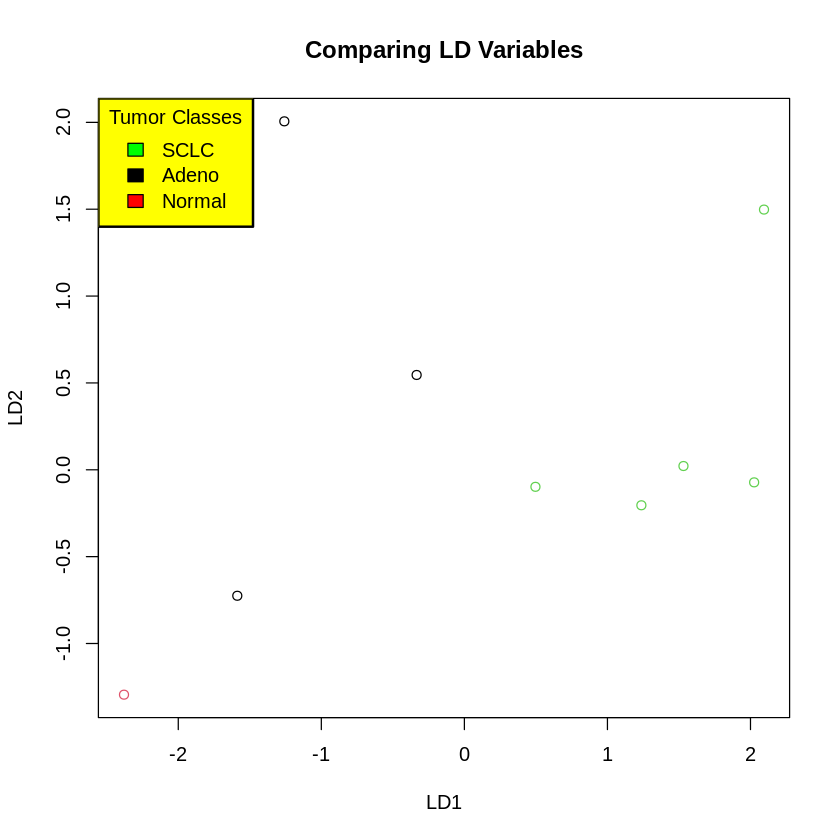

In [ ]:
plot(dat.pred$x, col = dat.pred$class,cex=1, main='Comparing LD Variables')
legend(x = "topleft", box.col = "black",
       bg ="yellow", box.lwd = 2 , title="Tumor Classes",
       legend=c("SCLC", "Adeno", "Normal"),
       fill = c("green", "black", "red"))

#6) and 7) Now repeat #4 and #5 using all the genes in the matrix as opposed to the first 2.

In [ ]:
dim(train)[2]

[1] 3014

In [ ]:
train[,dim(train)[2]]

[1] "Adeno"  "Adeno"  "Adeno"  "Adeno"  "Adeno"  "Adeno"  "SCLC"   "SCLC"  
 [9] "SCLC"   "SCLC"   "SCLC"   "SCLC"   "Normal" "Normal" "Normal"

In [ ]:
tr = train[,1:dim(train)[2]-1]
class(tr)

[1] "data.frame"

In [ ]:
head(tr[])

,1007_s_at,1053_at,121_at,1294_at,1487_at,1729_at,177_at,200003_s_at,200005_at,200016_x_at,⋯,65521_at,78047_s_at,823_at,90265_at,AFFX-HSAC07/X00351_3_at,AFFX-HSAC07/X00351_M_at,AFFX-HUMGAPDH/M33197_5_at,AFFX-M27830_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9.26,5.15,7.35,6.14,6.45,6.10,4.63,11.71,8.16,9.95,⋯,6.21,6.85,6.03,6.96,12.25,11.35,10.09,5.71,8.45,8.16
2,8.69,4.57,7.32,6.32,6.13,6.13,4.72,10.72,7.26,10.24,⋯,6.33,7.21,5.67,7.36,11.71,9.59,7.75,5.64,7.13,8.17
3,8.51,5.20,7.13,6.09,6.64,6.52,4.86,10.99,8.60,9.71,⋯,6.30,6.78,5.22,7.26,11.65,10.86,9.13,5.60,6.92,7.86
4,8.38,4.92,7.50,6.08,6.54,6.83,4.42,10.67,7.05,9.58,⋯,6.57,6.85,6.24,7.11,11.07,10.17,10.18,5.74,7.50,7.91
5,7.70,4.60,7.40,5.98,5.93,6.16,4.41,10.82,7.43,9.35,⋯,6.39,6.73,5.96,6.98,11.73,9.83,9.22,5.86,7.67,7.68
6,8.16,5.24,7.35,6.09,6.51,6.12,4.79,10.69,7.62,9.52,⋯,6.14,6.88,6.14,7.12,11.06,9.85,10.30,5.67,7.59,7.82


In [ ]:
clas = train[,dim(train)[2]]

In [ ]:
clas_test = test$class

In [ ]:
# dat.lda <- lda(clas~X1007_s_at + X1053_at,datx)
# dat.pred <- predict(dat.lda,datx)
dat.lda <- lda(clas ~ ., data=tr)
dat.pred <- predict(dat.lda, data=tr)

Warning message in lda.default(x, grouping, ...):
“variables are collinear”


In [ ]:
head(dat.lda$scaling)

,LD1,LD2
`1007_s_at`,-0.0005460847,0.0013171793
`1053_at`,0.0033180022,0.0068378681
`121_at`,0.0101669660,-0.0119051411
`1294_at`,-0.0076608868,0.0035908213
`1487_at`,-0.0109208851,0.0039141922
`1729_at`,-0.0023726156,-0.0006404324


In [ ]:
dat.pred <- predict(dat.lda, test[,1:dim(test)[2]-1])

In [ ]:
table(clas_test, dat.pred$class)

         
clas_test Adeno Normal SCLC
   Adeno      4      0    0
   Normal     0      2    0
   SCLC       0      0    3

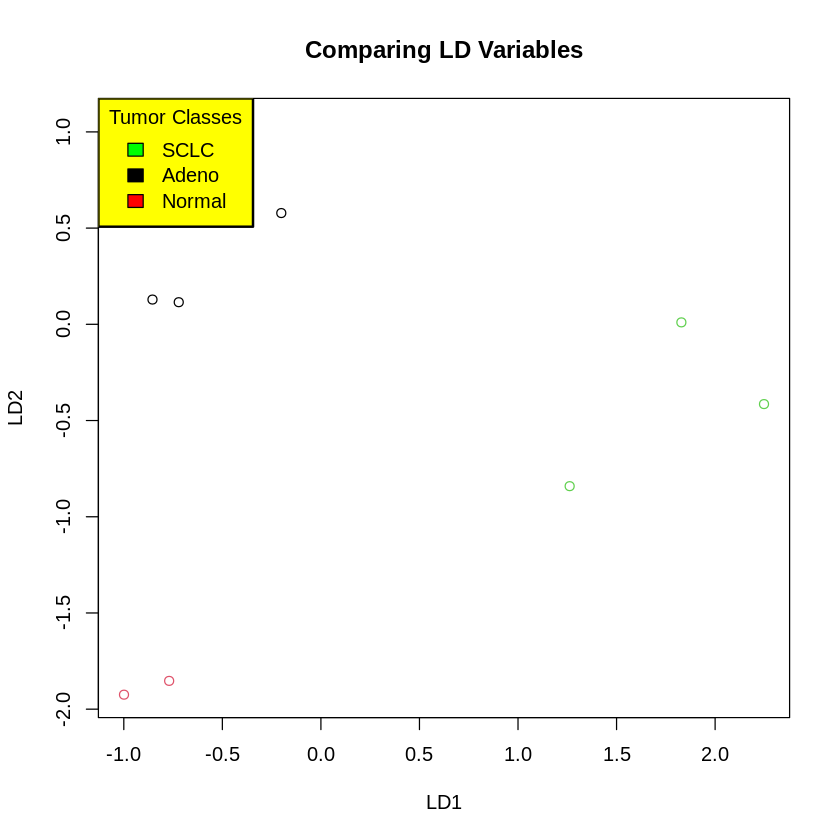

In [ ]:
plot(dat.pred$x, col = dat.pred$class,cex=1, main='Comparing LD Variables')
legend(x = "topleft", box.col = "black",
       bg ="yellow", box.lwd = 2 , title="Tumor Classes",
       legend=c("SCLC", "Adeno", "Normal"),
       fill = c("green", "black", "red"))